# 3. Розв'язування нелінійних рівнянь
------------

Нехай маємо рівняння

$(1)\qquad\qquad\qquad
f(x)=0, \quad x\in [a,b],$

де $f:[a,b]\to \mathbb{R}$ -- неперервна на $[a,b]$ функція.


### 3.1.2. Метод бісекції
--------------
Нехай рівняння (1) 
має і тільки один розв'язок на відрізку $[a,b]$, тобто маємо 

$(2)\qquad\qquad\qquad f(a)f(b) < 0$.

Ідея методу бісекції полягає у обчисленні послідовності $x_0, x_1, \ldots ,x_n, \ldots$ за формулою $x_n=(a+b)/2$ шляхом покрокового звуження проміжку $(a,b)$ за рахунок ділення його навпіл. На кожному кроці за новий проміжок $(a,b)$ беруть ту частину попереднього проміжку, де локалізований розв'язок, тобто виконується умова (2).
Поділ виконують до тих пір, коли виконається умова 

$(3)\qquad\qquad\qquad |b-a| < eps,$ 

де $eps$ -- задана величина (точність). 

Останнє з обчислених значень $x_n$ є наближенням розв'язку рівняння з точністю $eps$.

Якщо для чергового значення $x_n$ виявится, що $f(x_n)=0$, то це значення беруть за розв'язок рівняння.  

#### Пояснення до використання програмного коду
-----------------
*   Підготувати середовище і потрібні функції : 
    1. виконати комірку для підготовки середовища
    2. виконати комірку, де **визначена** функція ``bisection`` 
    3. виконати комірку, де **визначена** функція ``plot_graphics``
    4. виконати комірку, де **визначена** функція ``f``
    
*   Локалізувати (графічно) розв'язок рівняння (1)
    1. виконати комірку, в якій задається відрізок ``[a, b]``
    2. виконати комірку, в якій будується графік; якщо ініціалізовано інтерактивний режим, то за допомогою масштабування графіку уточнити (звузити) відрізок ``[a, b]``, щоб на ньому знаходився лише один розв'язок рівняння, інакше - виконувати наступні пункти
    3. виконати комірку, в якій задається звужений відрізок ``[a, b]``
    4. виконати комірку, в якій будується графік на звуженому відрізку ``[a, b]``
    5. пункти 3 і 4 можна послідовно повторювати для точнішої локалізації потрібного розв'язку
    
*   Обчислити наближення локалізованого розв'язку
    1. задати точність ``eps`` наближеного розв'язку
    2. виконати комірку, де є **виклик** функції ``bisection``
    3. для знаходження іншого розв'язку виконати дії пунктів локалізації

#### Програмна реалізація методу
------------

>#### Підготовка середовища

In [1]:
# при виконанні в JupyterLab наступний рядок розкоментувати
#%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt

>#### ``bisection`` -- функція, яка реалізує метод бісекції 

In [2]:
def bisection(f,a,b,eps):
    """ знаходження методом бісекції наближеного кореня рівняння (1), 
        де f -- непервна на відрізку [a,b] функція, 
        на цьому відрізку рівняння має і тільки один розв'язок, 
        eps -- задана точність
    """
    k = 0
    ba = np.abs(b-a)
    if ba < eps:
        return (a+b)/2, k+1
    while ba > eps:
        fa = f(a)
        k += 1
        x = (a+b)/2
        fx = f(x)
        if fx==0 :
            return x, k
        if fa*fx < 0:
            b = x
        else:
            a = x
        ba = np.abs(b-a)
    return (a+b)/2, k+1

>#### ``plot_graphics`` -- функція для побудови графіка функції ``f`` на відрізку ``[a,b]`` за значеннями в ``n`` точках 

In [3]:
def plot_graphics(f, a, b, n):
    """фуункція для побудови графіка функції f 
       на відрізку [a,b] за значеннями в n точках 
    """
    xarr = np.linspace(a, b, n)    
    y=f(xarr) 
    fig = plt.figure()
    ax = fig.gca()
    ax.plot(xarr,y)
    ax.axhline(color="grey", ls="--", zorder=-1)
    ax.axvline(color="grey", ls="--", zorder=-1)
    ax.set_xlim(a,b)
    plt.show()

#### Обчислювальні експерименти
------------

Знаходження чисельних розв'язків методом бісекції продемонструємо на прикладах.

**Приклад 1.** Нехай у рівнянні (1) $f(x)=sin(x^2-2x)$. Обчислити методом бісекції другий додатній розв'язок цього рівняння з точністю $eps=10^{-5}$.

Легко переконатися, що першими додатніми розв'язками є $x_1=2.0$, а також $x_2 = 1+np.sqrt(1+np.pi)$ і $x_3 = 1+np.sqrt(1+2*np.pi)$. Виконуючи обчислення, отримаємо $x_2 = 3.035090330572526$ і $x_3 = 3.698737724785346$ з точністю $10^{-15}$. Далі називатимемо їх аналітичними розв'язками. Збережемо їхні значення для подальшого аналізу похибок чисельних розв'язків:

In [4]:
x_1 = 2.0 
x_2 = 3.035090330572526 
x_3 = 3.698737724785346

>#### ``f`` -- функція лівої частини рівняння (1) 

In [5]:
def f(x):
    """функція лівої частини рівняння (1)"""
    return np.sin(x*x-2*x)

>#### Побудова графіку функції ``f``

In [6]:
# задання відрізка
a=0
b=10

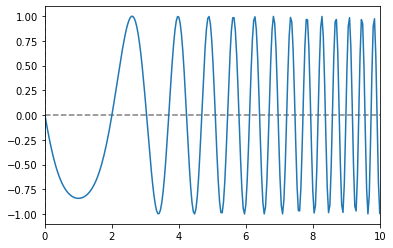

In [7]:
plot_graphics(f, a, b, 256)

>#### Уточнення проміжку ``[a, b]``

In [8]:
# задання оновленого відрізка
a=2.8
b=3.2

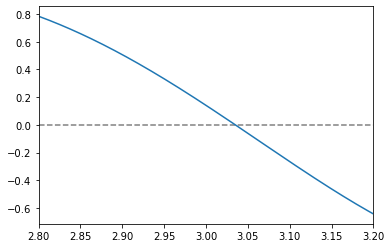

In [9]:
plot_graphics(f, a, b, 256)

In [10]:
# задання оновленого відрізка
a=3.0
b=3.05

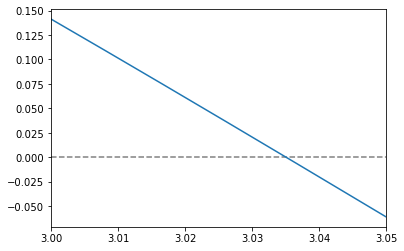

In [11]:
plot_graphics(f, a, b, 256)

In [12]:
# задання оновленого відрізка
a=3.03
b=3.04

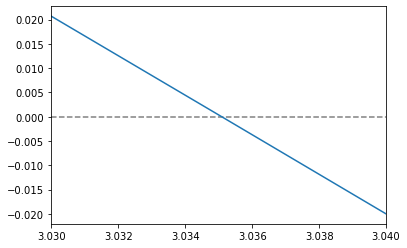

In [13]:
plot_graphics(f, a, b, 256)

In [14]:
# задання оновленого відрізка
a=3.034
b=3.036

In [15]:
#знаходження чисельного розв'язку
eps = 0.00001
x,k = bisection(f, a, b, eps)
print(f"Розв'язок рівняння x={x} з точністю eps={eps}, кількість ітерацій k={k}.")

Розв'язок рівняння x=3.03508984375 з точністю eps=1e-05, кількість ітерацій k=9.


In [16]:
print(f"Відносна похибка чисельного розв'язку delta={np.abs(x_2-x)/x_2}")

Відносна похибка чисельного розв'язку delta=1.6039803540187618e-07


Зазначимо, що згідно теорії, викладеної в підрозділі 3.2, наближення розв'язку рівняння (1) методом бісекції має збігатися до точного розв'язку. Уявлення про характер цієї збіжності можна отримати, якщо задавати менші значення параметра ``eps``.

In [17]:
#знаходження чисельного розв'язку
eps = 0.0000001
x,k = bisection(f, a, b, eps)
print(f"Розв'язок рівняння x={x} з точністю eps={eps}, кількість ітерацій k={k}.")

Розв'язок рівняння x=3.0350903015136717 з точністю eps=1e-07, кількість ітерацій k=16.


In [18]:
print(f"Відносна похибка чисельного розв'язку delta={np.abs(x_2-x)/x_2}")

Відносна похибка чисельного розв'язку delta=9.57429640268604e-09


In [19]:
#знаходження чисельного розв'язку
eps = 0.000000001
x,k = bisection(f, a, b, eps)
print(f"Розв'язок рівняння x={x} з точністю eps={eps}, кількість ітерацій k={k}.")

Розв'язок рівняння x=3.035090330600738 з точністю eps=1e-09, кількість ітерацій k=22.


In [20]:
print(f"Відносна похибка чисельного розв'язку delta={np.abs(x_2-x)/x_2}")

Відносна похибка чисельного розв'язку delta=9.295307964700006e-12


**Приклад 2.** Нехай у рівнянні (1) $f(x)=cos(x^2-2x)$. Обчислити методом бісекції другий додатній розв'язок цього рівняння з точністю $eps=10^{-5}$.

Легко переконатися, що $x_2 = 1+np.sqrt(1+3*np.pi/2) = 3.390060455382811$ і $x_3 = 1+np.sqrt(1+5*np.pi/2) = 3.975564086685831$ з точністю $10^{-15}$. Збережемо ці значення:

In [36]:
x_2 = 1+np.sqrt(1+3*np.pi/2)
x_3 = 1+np.sqrt(1+5*np.pi/2)

>#### ``fcs`` -- функція лівої частини рівняння (1) 

In [37]:
def fcs(x):
    """функція лівої частини рівняння (1)"""
    return np.cos(x*x-2*x)

>#### Легко переконатися в аналогічний до попереднього прикладу спосіб, що шуканий розв'язок заданого рівняння знаходиться на відрізку ``[3.389, 3.390]``. 

Послідовне виконання наступних комірок даватиме чисельний розв'язок рівняння (1) при відповідних значеннях параметра ``eps``:   

In [38]:
# задання відрізка
a=3.389
b=3.390

In [39]:
#знаходження чисельного розв'язку
eps = 0.00001
x,k = bisection(f, a, b, eps)
print(f"Розв'язок рівняння x={x} з точністю eps={eps}, кількість ітерацій k={k}.")

Розв'язок рівняння x=3.3899960937499998 з точністю eps=1e-05, кількість ітерацій k=8.


In [40]:
print(f"Відносна похибка чисельного розв'язку delta={np.abs(x_2-x)/x_2}")

Відносна похибка чисельного розв'язку delta=1.8985393817718306e-05


In [41]:
#знаходження чисельного розв'язку
eps = 0.0000001
x,k = bisection(f, a, b, eps)
print(f"Розв'язок рівняння x={x} з точністю eps={eps}, кількість ітерацій k={k}.")

Розв'язок рівняння x=3.389999969482422 з точністю eps=1e-07, кількість ітерацій k=15.


In [42]:
print(f"Відносна похибка чисельного розв'язку delta={np.abs(x_2-x)/x_2}")

Відносна похибка чисельного розв'язку delta=1.7842130305719424e-05


In [43]:
#знаходження чисельного розв'язку
eps = 0.000000001
x,k = bisection(f, a, b, eps)
print(f"Розв'язок рівняння x={x} з точністю eps={eps}, кількість ітерацій k={k}.")

Розв'язок рівняння x=3.3899999995231633 з точністю eps=1e-09, кількість ітерацій k=21.


In [44]:
print(f"Відносна похибка чисельного розв'язку delta={np.abs(x_2-x)/x_2}")

Відносна похибка чисельного розв'язку delta=1.7833268888100083e-05


**Приклад 3.** Нехай у рівнянні (1) $f(x)=x-1$. Обчислити методом бісекції розв'язок цього рівняння з точністю $eps=10^{-5}$.

Метою цього прикладу є продемонструвати особливість алгоритму методу бісекції, а саме потребу в перевірці, чи на якомусь кроці точка поділу відрізка  навпіл не співпаде з розв'язком рівняння. Виконаємо послідовно наступні комірки:

In [25]:
def flnr(x):
    """функція лівої частини рівняння (1)"""
    return x-1

In [26]:
# задання відрізка
a=0
b=4.0

In [27]:
#знаходження чисельного розв'язку
eps = 0.00001
x,k = bisection(flnr, a, b, eps)
print(f"Розв'язок рівняння x={x} з точністю eps={eps}, кількість ітерацій k={k}.")

Розв'язок рівняння x=1.0 з точністю eps=1e-05, кількість ітерацій k=2.


Як бачимо, за рахунок зазначеної вище перевірки чисельний розв'язок буде отримано вже на другій ітерації, хоч при цьому довжина отриманого після поділу відрізка рівна 1. Легко переконатися безпосереднім обчисленням, що при відсутності такої перевірки матимемо неправильний результат.

**Висновок.** Оскільки швидкість збіжності методу бісекції є невисокою, доцільно попередньо локалізувати шуканий розв'язок рівняння на якомога короткому відрізку.